<a href="https://colab.research.google.com/github/ShadyGirgis79/iPhone-Purchase/blob/main/iPhone_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Postprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

# Dataset: **"iPhone Purchase"**

In [ ]:
phone = pd.read_csv("Iphone_purchase.csv")
print(phone.shape)
phone.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
phone.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
phone.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Preprocessing

## Changing Categorical Values to Numerical Values

In [ ]:
# There is only 1 categorical column 'gender'
phone['Gender'] = phone['Gender'].map({'Male':1 ,'Female':0})
phone.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


## Data Normalization

In [ ]:
big_values_columns = ['Age', 'EstimatedSalary']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns using Min-Max normalization
phone[big_values_columns] = scaler.fit_transform(phone[big_values_columns])

phone.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.023810,0.029630,0
1,15810944,1,0.404762,0.037037,0
2,15668575,0,0.190476,0.207407,0
3,15603246,0,0.214286,0.311111,0
4,15804002,1,0.023810,0.451852,0


## Remove unneeded columns

In [ ]:
# There is only 1 unneeded column 'User  ID'
phone = phone.drop(['User ID'] , axis = 1)
phone.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


## Removing Outliers using the Z-Score Method

In [ ]:
#Calculate the mean and standard deviation for each column
phone_means = np.mean(phone, axis=0)
phone_std_devs = np.std(phone, axis=0)

#Calculate the z-score for each cell based on its column
z_scores_phone = (phone - phone_means) / phone_std_devs

#Define a threshold for outliers (e.g., ±3 standard deviations)
threshold = 3

#Identify outliers
outliers_BCD = np.abs(z_scores_phone) > threshold

print(z_scores_phone.shape)
z_scores_phone.head()

(400, 4)


,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,-0.745936
1,1.020204,-0.253587,-1.460681,-0.745936
2,-0.980196,-1.113206,-0.785290,-0.745936
3,-0.980196,-1.017692,-0.374182,-0.745936
4,1.020204,-1.781797,0.183751,-0.745936


In [ ]:
#Remove outliers
phone_cleaned = phone[~np.any(outliers_BCD, axis=1)]

print(phone_cleaned.shape)
phone_cleaned.head()

(400, 4)


,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


## Correlation Matrix

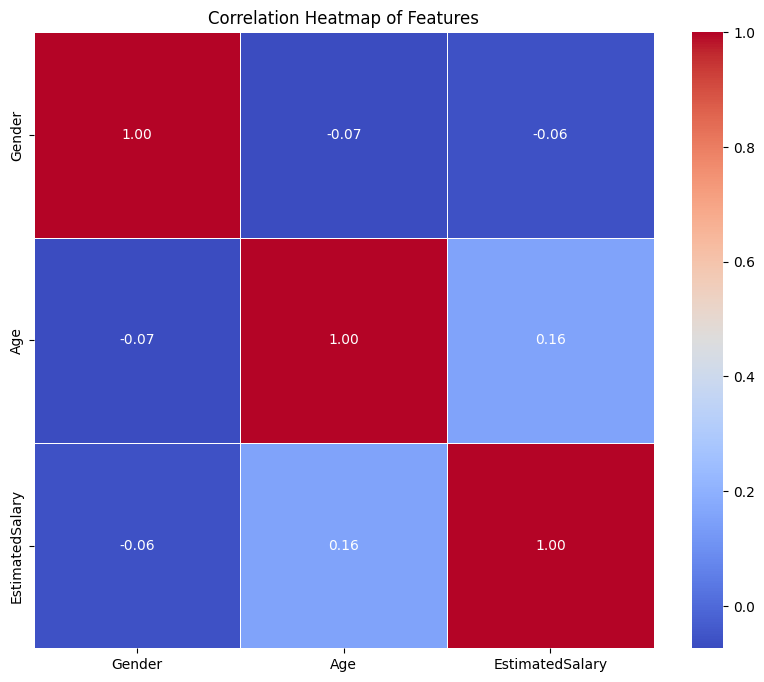

In [ ]:
#Exclude output column
feature_columns = phone_cleaned.iloc[:, :-1]

#Calculate the correlation matrix
corr_matrix = feature_columns.corr()

#Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
phone = pd.DataFrame(phone_cleaned)
print(phone.shape)
phone.head()

(400, 4)


,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


## Splitting the Data

In [ ]:
X = phone.drop(['Purchased'] , axis = 1)
y = phone['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

## Dictionaries for Comparison

In [ ]:
# Create a dictionary of accuracies for later comparison between models
accuracies = {}

# Create a dictionary of times for later comparison between models
times = {}

# Models

## KNN

In [ ]:
# Training the model 20 times; each with different k, ranging from 1 to 20
k_values = range(1, 21)
errors = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  error = 1 - accuracy_score(y_test, knn_pred)
  errors.append(error)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': knn_pred}).head()

,Test values,Predict
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


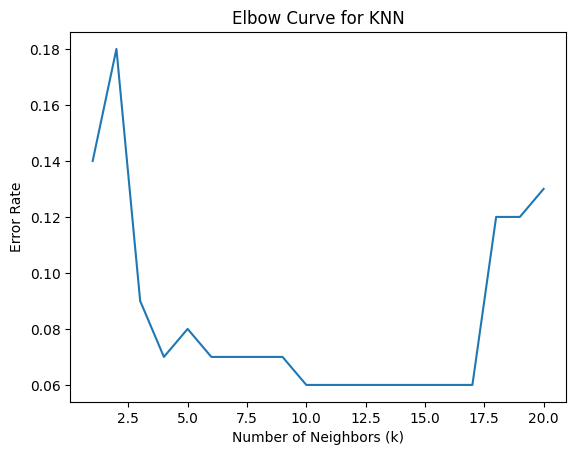

In [ ]:
# Plot the elbow curve
plt.plot(k_values, errors)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Curve for KNN')
plt.show()

In [ ]:
# The best k is 15, as it has the lowest error rate, which is relatively constant in comparison with other values of k
knn = KNeighborsClassifier(n_neighbors=15)
start_time = time.time()
knn.fit(X_train, y_train)
tt_knn = time.time() - start_time
times['knn'] = tt_knn
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
accuracies['knn'] = knn_acc
print("Accuracy:", knn_acc)

Accuracy: 0.94


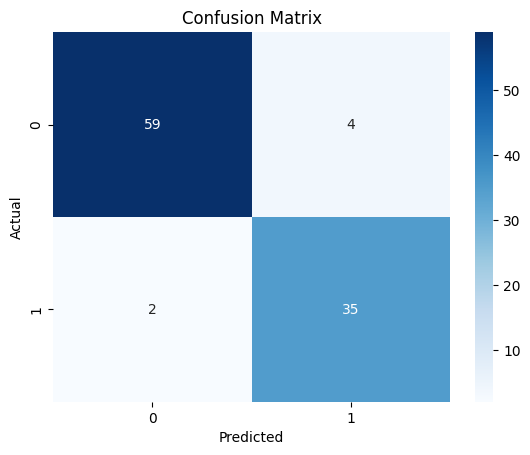

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Naïve Bayes Classifier

In [ ]:
# This model has only one parameter which is 'var_smoothing', and its best value is the default: '1e-9'
nb = GaussianNB()
start_time = time.time()
nb.fit(X_train, y_train)
tt_nb = time.time() - start_time
times['nb'] = tt_nb

In [ ]:
nb_pred = nb.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': nb_pred}).head()

,Test values,Predict
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


In [ ]:
nb_acc = accuracy_score(y_test, nb_pred)
accuracies['nb'] = nb_acc
print("Accuracy:", nb_acc)

Accuracy: 0.93


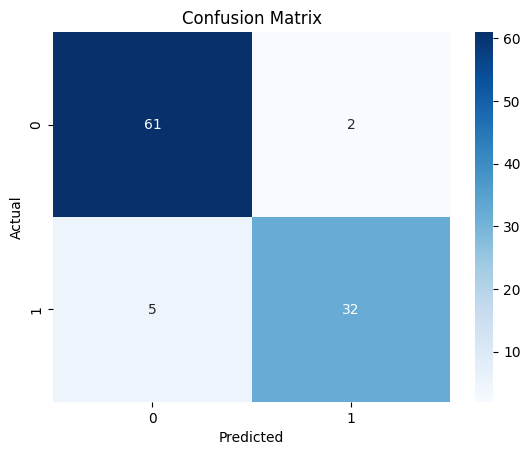

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## MLP Classifier

In [ ]:
# Training with default parameters: a 100-node hidden layer, relu activation, adam solver, and alpha=0.0001
mlp = MLPClassifier(random_state=42)
start_time = time.time()
mlp.fit(X_train, y_train)
tt_mlp_1 = time.time() - start_time
times['mlp_1'] = tt_mlp_1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp_pred = mlp.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': mlp_pred}).head()

,Test values,Predict
209,0,0
280,1,1
33,0,0
210,1,1
93,0,0


In [ ]:
mlp_acc = accuracy_score(y_test, mlp_pred)
accuracies['mlp_1'] = mlp_acc
print("Accuracy:", mlp_acc)

Accuracy: 0.88


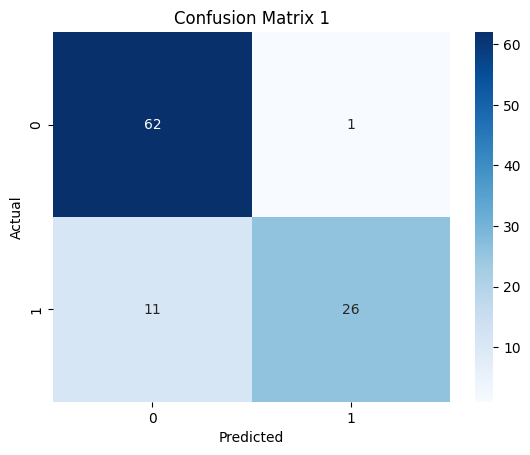

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, mlp_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 1')

# Show the plot
plt.show()

### Changing the Hyperparameters

In [ ]:
# Changing parameters: 2 hidden layers with 160, 80 nodes, logistic activation, and lbfgs solver
mlp_2 = MLPClassifier(hidden_layer_sizes=(160, 80), activation='logistic', solver='lbfgs', random_state=42)
start_time = time.time()
mlp_2.fit(X_train, y_train)
tt_mlp_2 = time.time() - start_time
times['mlp_2'] = tt_mlp_2

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mlp_pred_2 = mlp_2.predict(X_test)

In [ ]:
mlp_acc_2 = accuracy_score(y_test, mlp_pred_2)
accuracies['mlp_2'] = mlp_acc_2
print("Accuracy:", mlp_acc_2)

Accuracy: 0.94


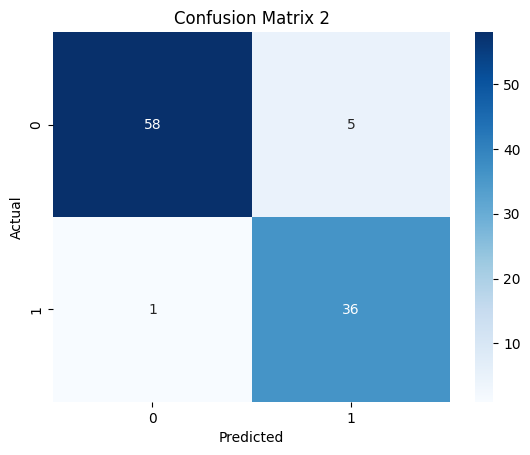

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, mlp_pred_2)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 2')

# Show the plot
plt.show()

**The model with the 2 hidden layers is much better than that of the 1 hidden layer.**

## SVM classifier

In [ ]:
# Training with the default kernel 'rbf'
svm = SVC(random_state=42)
start_time = time.time()
svm.fit(X_train, y_train)
tt_svm_1 = time.time() - start_time
times['svm_1'] = tt_svm_1

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': svm_pred}).head()

,Test values,Predict
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


In [ ]:
svm_acc = accuracy_score(y_test, svm_pred)
accuracies['svm_1'] = svm_acc
print("Accuracy:", svm_acc)

Accuracy: 0.94


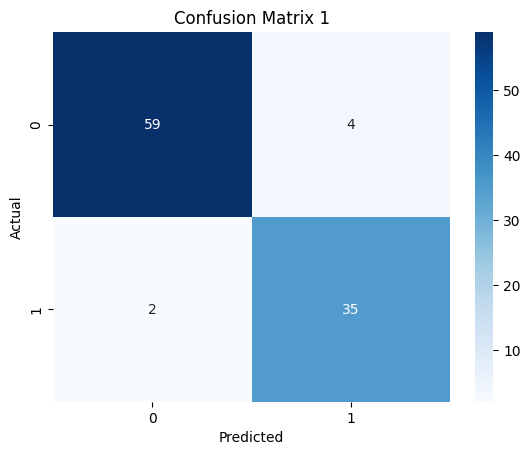

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 1')

# Show the plot
plt.show()

### Changing the Hyperparameters

In [ ]:
# Training with a polynomial 2nd degree kernel
svm_2 = SVC(kernel='poly', degree=2, random_state=42)
start_time = time.time()
svm_2.fit(X_train, y_train)
tt_svm_2 = time.time() - start_time
times['svm_2'] = tt_svm_2

In [ ]:
svm_pred_2 = svm_2.predict(X_test)

In [ ]:
svm_acc_2 = accuracy_score(y_test, svm_pred_2)
accuracies['svm_2'] = svm_acc_2
print("Accuracy:", svm_acc_2)

Accuracy: 0.95


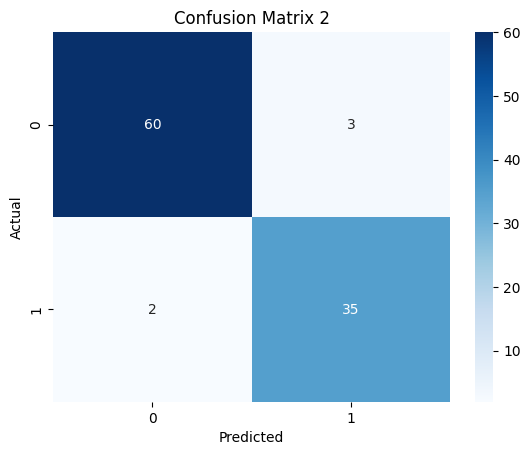

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, svm_pred_2)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 2')

# Show the plot
plt.show()

**The 'poly' kernel is slightly better than the 'rbf' kernel.**



## Decision Tree

In [ ]:
# Training with a tree of max depth 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
tt_dt_1 = time.time() - start_time
times['dt_1'] = tt_dt_1

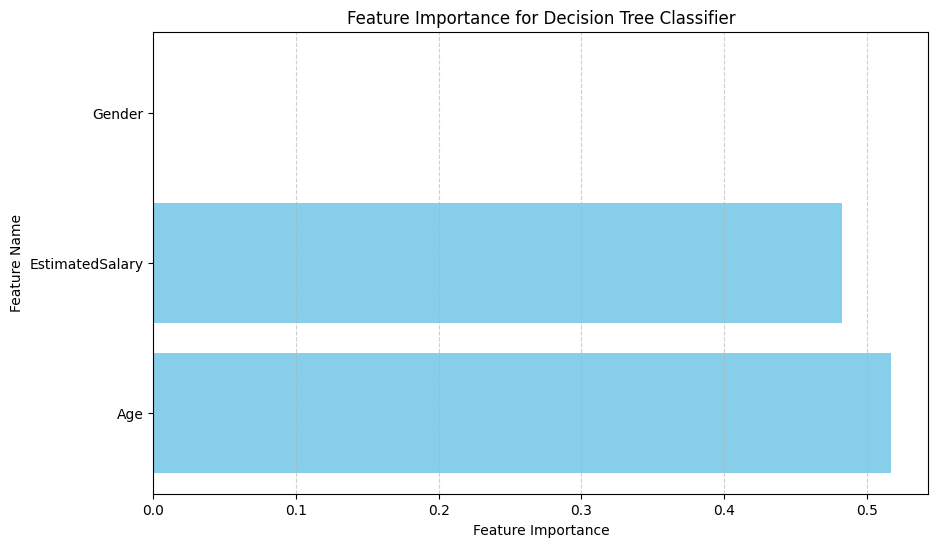

In [ ]:
# Get feature importances
feature_importances = dt.feature_importances_

# Get feature names
feature_names = feature_names = phone.columns.tolist()

# Sort feature importances and feature names by importance (optional for better readability)
feature_importances_sorted = feature_importances.argsort()  # Sort indices by importance
feature_names_sorted = [feature_names[i] for i in feature_importances_sorted]  # Sort names by importance (if applicable)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.barh(feature_names_sorted, feature_importances[feature_importances_sorted], color='skyblue')  # Use sorted importance and names (if applicable)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree Classifier')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

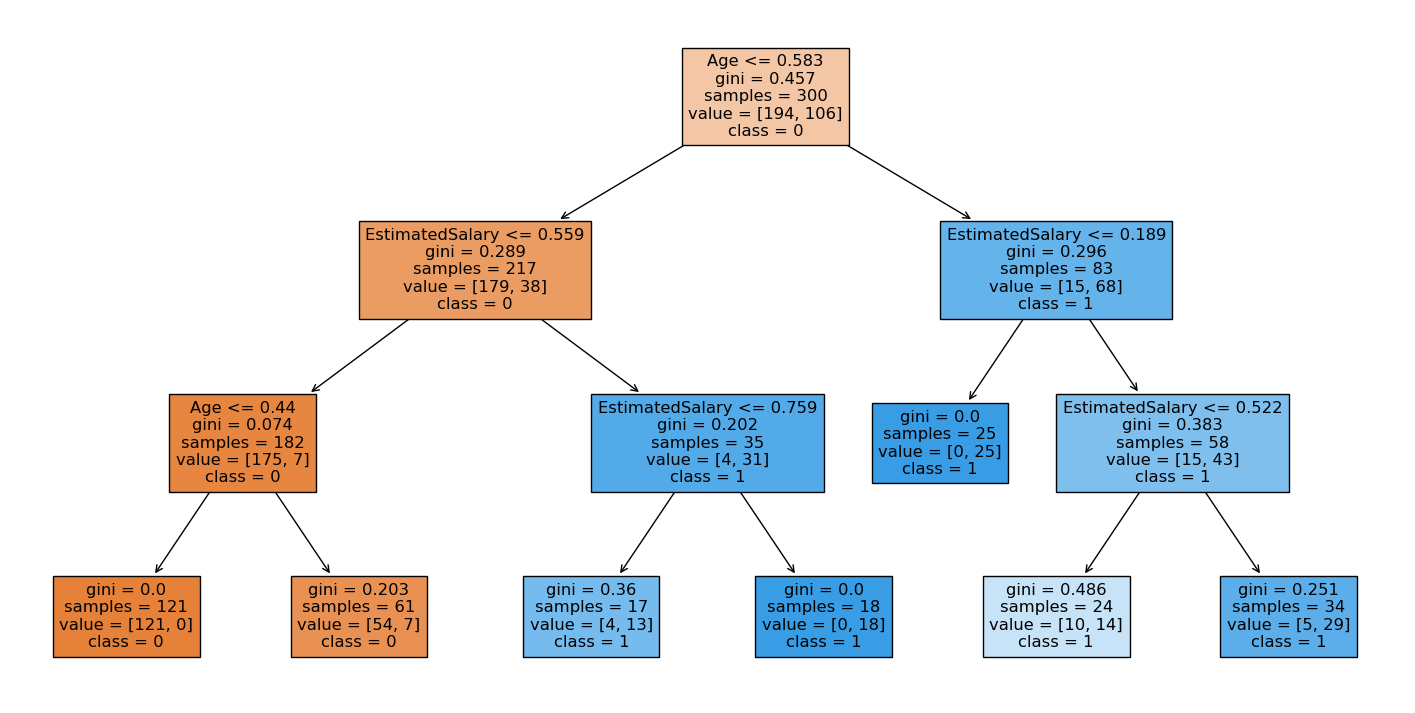

In [ ]:
# Convert feature names to strings
feature_names_str = [str(feature) for feature in X.columns]

# Convert class names to strings
class_names_str = [str(class_) for class_ in dt.classes_]

# Plot the decision tree with string names
plt.figure(figsize=(18, 9))
tree.plot_tree(dt, feature_names=feature_names_str, class_names=class_names_str, filled=True)
plt.show()

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': dt_pred}).head()

,Test values,Predict
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


In [ ]:
dt_acc = accuracy_score(y_test, dt_pred)
accuracies['dt_1'] = dt_acc
print("Accuracy:", dt_acc)

Accuracy: 0.92


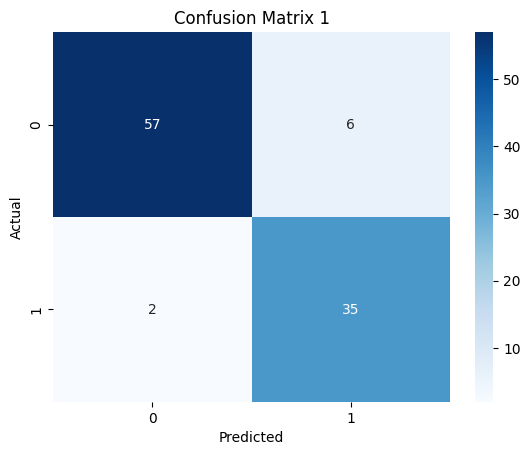

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 1')

# Show the plot
plt.show()

### Changing the Hyperparameters

In [ ]:
# As there are only 2 important features, so we just need a depth of 2
dt_2 = DecisionTreeClassifier(max_depth=2, min_samples_split=2, random_state=42)
start_time = time.time()
dt_2.fit(X_train, y_train)
tt_dt_2 = time.time() - start_time
times['dt_2'] = tt_dt_2

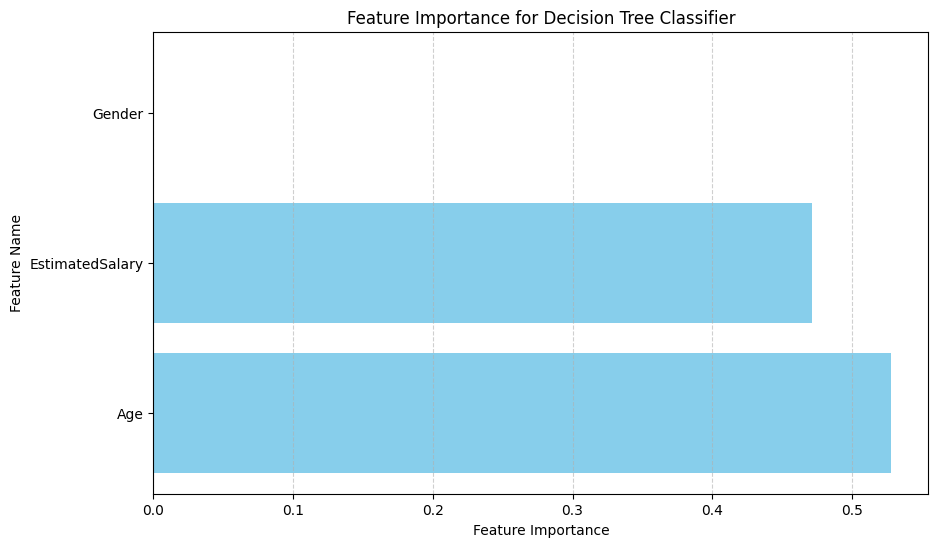

In [ ]:
# Get feature importances
feature_importances = dt_2.feature_importances_

# Get feature names
feature_names = feature_names = phone.columns.tolist()

# Sort feature importances and feature names by importance (optional for better readability)
feature_importances_sorted = feature_importances.argsort()  # Sort indices by importance
feature_names_sorted = [feature_names[i] for i in feature_importances_sorted]  # Sort names by importance (if applicable)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.barh(feature_names_sorted, feature_importances[feature_importances_sorted], color='skyblue')  # Use sorted importance and names (if applicable)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree Classifier')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

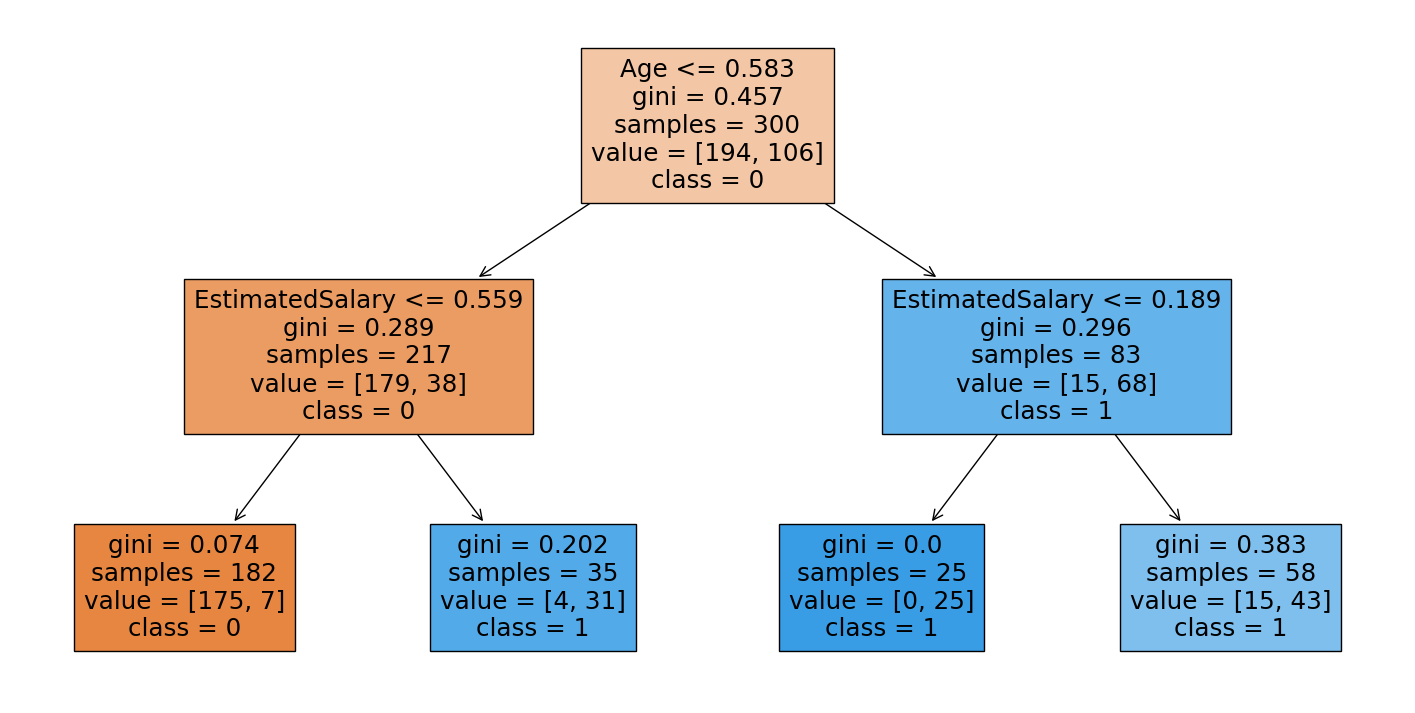

In [ ]:
# Convert feature names to strings
feature_names_str = [str(feature) for feature in X.columns]

# Convert class names to strings
class_names_str = [str(class_) for class_ in dt_2.classes_]

# Plot the decision tree with string names
plt.figure(figsize=(18, 9))
tree.plot_tree(dt_2, feature_names=feature_names_str, class_names=class_names_str, filled=True)
plt.show()

In [ ]:
dt_pred_2 = dt_2.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': dt_pred_2}).head()

,Test values,Predict
209,0,1
280,1,1
33,0,0
210,1,1
93,0,0


In [ ]:
dt_acc_2 = accuracy_score(y_test, dt_pred_2)
accuracies['dt_2'] = dt_acc_2
print("Accuracy:", dt_acc_2)

Accuracy: 0.92


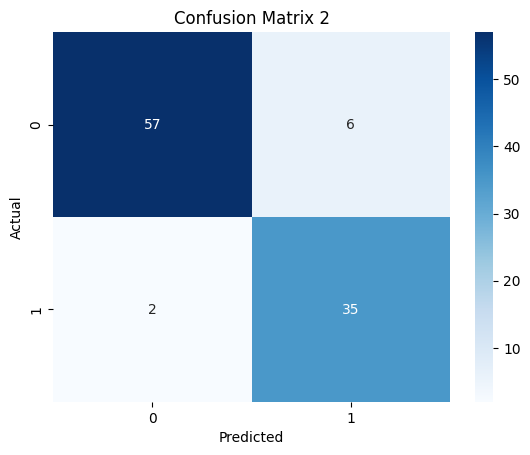

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_pred_2)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 2')

# Show the plot
plt.show()

**Simpler tree is faster!**

# Comparison

## Training Time Comparison

In [ ]:
# Extract model names and times for plotting
models = list(times.keys())
times = list(times.values())

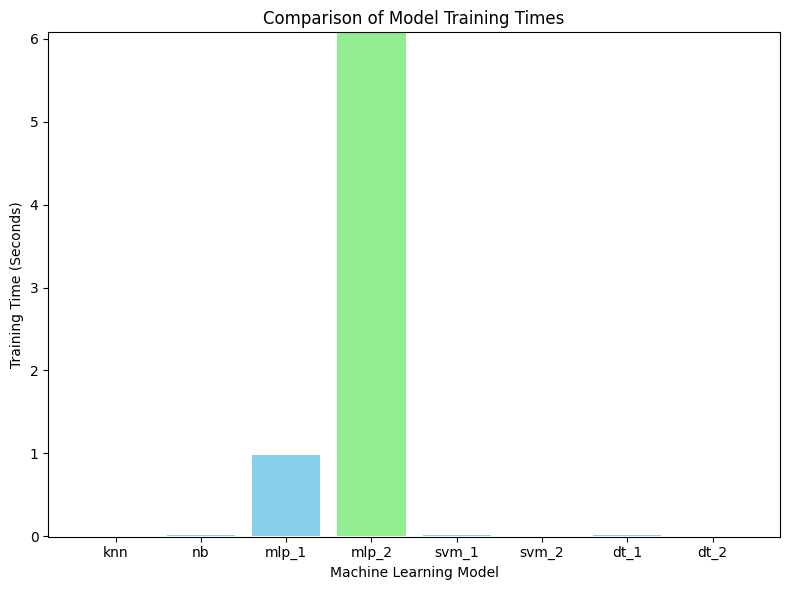

In [ ]:
# Get the minimum time
min_time = min(times)

# Get the maximum time
max_time = max(times)

# Define a color for the maximum time bar
max_time_color = 'lightgreen'

# Create a list to hold bar colors (default blue for all except max time)
bar_colors = ['skyblue'] * len(models)

# Find the index of the model with the maximum time
max_index = times.index(max_time)

# Set the color of the maximum time bar
bar_colors[max_index] = max_time_color

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(models, times, color=bar_colors)
plt.xlabel('Machine Learning Model')
plt.ylabel('Training Time (Seconds)')
plt.title('Comparison of Model Training Times')
plt.ylim(min_time - 0.01, max_time + 0.01)  # Set y-axis limits with a buffer below the minimum

# Display the plot
plt.tight_layout()
plt.show()

## **The MLP classifier with 2 hidden layers had the maximum training time. The MLP classifier with 200 iterations follows it.**

## Accuracy Comparison

In [ ]:
# Extract model names and accuracies for plotting
models = list(accuracies.keys())
accuracies = list(accuracies.values())

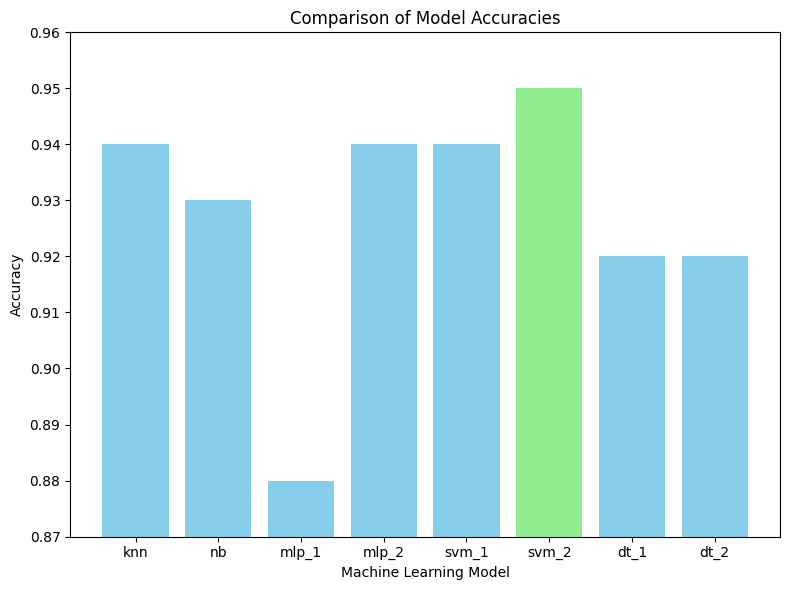

In [ ]:
# Get the minimum accuracy
min_accuracy = min(accuracies)

# Get the maximum accuracy
max_accuracy = max(accuracies)

# Define a color for the maximum accuracy bar
max_accuracy_color = 'lightgreen'

# Create a list to hold bar colors (default blue for all except max accuracy)
bar_colors = ['skyblue'] * len(models)

# Find the index of the model with the maximum accuracy
max_index = accuracies.index(max_accuracy)

# Set the color of the maximum accuracy bar
bar_colors[max_index] = max_accuracy_color

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(models, accuracies, color=bar_colors)
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(min_accuracy - 0.01, max_accuracy + 0.01)  # Set y-axis limits with a buffer below the minimum

# Display the plot
plt.tight_layout()
plt.show()

## **The SVM classifier is the best here with accuracy of 95.00%**
## The dataset is simple; has only 3 features, so simpler models like KNN, NB, and SVM were more suitable here than more complex ones like MLP, and Decision Tree.

## **Here, the SVM classifier is perfect; it gives the highest accuracy with a very small training time.**